In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import urllib
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
import datetime as dt

#req = urllib.request.urlretrieve('https://covid19.who.int/WHO-COVID-19-global-data.csv',filename = 'WHO-COVID-19-global-data.csv')
class Corona:
    title_size = {'fontsize':16}
    label_size = 15
    font_size  = 20
    fig_size   = (12,6)
    label_rotation = 90
    
    def __init__(self):
        self.data =  pd.read_csv('/home/arsath/Desktop/Data-science-main/WHO-COVID-19-global-data.csv')
        self.high_cumulative_cases      = None
        self.high_cumulative_deaths     = None
        self.overall_df                 = None
        self.countries                  = None
        
        
        to_remove = self.data[self.data.loc[:,'WHO_region'] == 'Other']
        #print(to_remove.loc[:,['Cumulative_cases','Cumulative_deaths']].max() )
        # Since it does not make much difference in our data we will remove that from our data
        #print(f'Before Removing {self.data.shape}')
        self.data.drop(index = to_remove.index,inplace=True)
        #print(self.data.dtypes)
        self.data['Date_reported'] = pd.to_datetime(self.data['Date_reported'])
        #print(self.data.dtypes)
        #print(f'After Removing {self.data.shape}')
        #print(self.data.isna().any())
        #print(self.data['Country_code'].isna().sum())
        null_values = self.data[self.data.loc[:,'Country_code'].isna()]
        self.data['Country_code'].fillna(null_values.loc[:,'Country'].str[0:2],inplace = True)
        #print(self.data['Date_reported'].agg(('min','max')))
        self.data.set_index('Country',inplace=True)
        self.overall_df = self.data.groupby(self.data.index).last() # For the purpose of getting highest cumulative cases for each country
        self.high_cumulative_cases   = self.overall_df.sort_values('Cumulative_cases',ascending = False)
        self.high_cumulative_deaths  = self.overall_df.sort_values('Cumulative_deaths',ascending = False)
        self.countries               = self.high_cumulative_cases.index[0:5]

    def cumulative_cases(self): 
        
        '''
        Definition: This Method plots the Overall no.of.New_Cases of top20 countries that is affected the most.
        
        Parameters: None
        
        Returns: Data of all the countries that are affected the most by new_cases in the order of high to low
        '''
        
        x = self.high_cumulative_cases.index[0:20]
        y = self.high_cumulative_cases.loc[:,'Cumulative_cases'][0:20]
        plt.figure(figsize = self.fig_size)
        plt.title('Countries Affected the most by Cumulative_Cases',fontdict= self.title_size)
        high_cum_case_plt  = sns.barplot(x = x, y = y,palette = 'Blues_d')
        high_cum_case_plt.tick_params(labelrotation = self.label_rotation,labelsize = self.label_size,axis = 'x')
        high_cum_case_plt.tick_params(labelsize = self.label_size,axis = 'y')
        plt.xlabel('Countries',fontsize = self.font_size)
        plt.ylabel('Cumulative_Cases',fontsize = self.font_size)
        plt.show()
        return self.high_cumulative_cases

    def cumulative_deaths(self):
        
        '''
        Definition : This Method plots the Overall no.of.Deaths of top20 countries that is affected the most.
        
        Parameters : None
        
        Returns: Data of all the countries that are affected the most by new_deaths in the order of high to low.
        '''
        
        x = self.high_cumulative_deaths.index[0:20]
        y = self.high_cumulative_deaths.loc[:,'Cumulative_deaths'][0:20]
        plt.figure(figsize  = self.fig_size)
        plt.title('Countries Affected the most by Cumulative_Deaths',fontdict = self.title_size)
        high_cum_deaths_plt = sns.barplot(x = x , y = y , palette = 'Blues_d')
        high_cum_deaths_plt.tick_params(labelrotation = self.label_rotation , labelsize = self.label_size,axis = 'x')
        high_cum_deaths_plt.tick_params(labelsize = self.label_size , axis = 'y')
        plt.xlabel('Countries',fontsize = self.font_size)
        plt.ylabel('Cumulative_Deaths',fontsize = self.font_size)
        plt.show()
        return self.high_cumulative_deaths
    
    def avg_new_cases(self,countries = None):
        
        '''
        Definition: This method plots average no.of.cases among countries
        
        Parameters: list of countries if left by default it will take top 5 countries with high number of overall new_cases
       
        Returns: None
        '''
        
        if countries is None:
            countries = self.countries
        for country in countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,'New_cases']
            plt.figure(figsize = self.fig_size)
            plt.title(country,fontdict = self.title_size)
            sns.barplot(x = x,y = y)
            plt.xlabel( 'MONTHS',fontsize = self.font_size)
            plt.ylabel( 'AVG_NEW_CASES',fontsize = self.font_size)
            plt.tick_params(labelsize = self.label_size)
            plt.grid(True)
            plt.show();

    def avg_new_deaths(self,countries = None):
        
        '''
        
        Definition: This method plots average no.of.Deaths among countries
        
        Parameters: list of countries if left by default it will take top 5 countries with high number of overall new_cases
       
        Returns: None
        '''
        
        if countries is None:
            countries = self.countries 
        for country in countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,'New_deaths']
            plt.figure(figsize = self.fig_size)
            plt.title(country,fontdict = self.title_size)
            sns.barplot(x = x,y = y)
            plt.xlabel( 'MONTHS',fontsize = self.font_size)
            plt.ylabel( 'AVG_NEW_DEATHS',fontsize = self.font_size)
            plt.tick_params(labelsize = self.label_size)
            plt.grid(True)
            plt.show();

    def most_affected_countries(self, by = 'New_cases'):
        
        '''
        Defnition: This Method plots the line plot for the given inputs for given Y_col
        
        Parameters: by -> 'New_cases' or 'New_deaths'
        
        Returns: None
        '''
        
        plt.figure(figsize = self.fig_size)
        plt.title(f'Most Affected Countries by {by}',fontdict= self.title_size)
        for country in self.countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,by]
            sns.lineplot(x = x,y = y,label = country)
        plt.xlabel('MONTHS',fontsize = self.font_size)
        plt.ylabel( 'AVG'+' '+by.upper(),fontsize = self.font_size)
        plt.tick_params(labelsize = self.label_size)
        plt.grid(True)
        plt.show();
    
    def most_affected_region(self):
        
        '''
        Definition: Returns the Series which shows highly affected region among world  
    
        Parameters: None
    
        Returns : Series of WHO_regions which are affected the most overall
        
        '''
        
        median = self.overall_df.loc[:,'Cumulative_cases'].sort_values(ascending = False).median()
        return self.overall_df[self.overall_df.loc[:,'Cumulative_cases'] >= median].value_counts(subset = 'WHO_region',ascending = False)

    def world_analysis(self, by = 'New_cases'):
        
        '''
        Definition: Shows how Disease is spread over the months
    
        Parameters: by -> New_cases or New_deaths
    
        Returns : None
        
        '''
        plt.figure(figsize = self.fig_size)
        plt.title(f'world Data by {by}',fontdict = self.title_size)
        x = self.data.loc[:,'Date_reported'].dt.month
        y = self.data.loc[:,by]
        sns.barplot(x = x , y = y)
        plt.xlabel('MONTHS',fontsize = self.font_size)
        plt.ylabel('AVG'+' '+by.upper(),fontsize = self.font_size)
        plt.tick_params(labelsize = self.label_size)
        plt.grid(True)
        plt.show()

    def today_data(self,by = 'New_cases'):
        
        '''
        Definition: plots how disease is being affected the countries
    
        Parameters: by : 'New_cases' or 'New_deaths'
    
        Returns : Series of WHO regions which are affected the most today
        '''
        today =  self.overall_df.sort_values('New_cases',ascending = False)
        plt.figure(figsize = self.fig_size)
        plt.title(f'world Data by {by}',fontdict= self.title_size)
        x = today.iloc[0:10].index
        y = today.iloc[0:10].loc[:,by]
        sns.barplot(x = x , y = y)
        plt.xlabel('Country',fontsize = self.font_size)
        plt.ylabel(ylabel = 'AVG'+' '+by.upper(),fontsize = self.font_size)
        plt.tick_params(labelrotation = self.label_rotation,axis = 'x')
        plt.tick_params(labelsize = self.label_size)
        plt.grid(True)
        plt.show()
        return today.iloc[0:10].value_counts('WHO_region')
    
    def case_and_death(self,countries = None):
         
        '''
        Definition: plots how disease is being affected the countries by plotting both New_Cases and New_Deaths
    
        Parameters: Country or Countries to plot
        '''
        if countries == None:
            countries = self.countries
        for country in countries:
            x = self.data.loc[country].loc[:,'New_cases']
            y = self.data.loc[country].loc[:,'New_deaths']
            
            plt.figure(figsize = self.fig_size)
            plt.title(country,fontdict = self.title_size)
            sns.scatterplot(x = x, y = y,data = self.data.loc[country])
            plt.xlabel('New_cases',fontsize = self.font_size)
            plt.ylabel('New_deaths',fontsize = self.font_size)
            plt.tick_params(labelsize = self.label_size)
            plt.show()

        
    def cnt_data(self,arg = 'New_cases',cnt_name = 'India'):
        
        '''
        Definition: Creates a plot how Country progressed over time
    
        Parameters: arg -> New_cases or New_Deaths , Name of the Country to plot.
        
        '''
        y = np.array(self.data.loc[cnt_name].loc[:,arg])
        plt.figure(figsize = self.fig_size)
        plt.title(f'{arg} Over Time in {cnt_name}',fontdict=self.title_size)
        plt.plot(y,'--*',color = 'red')
        plt.xlabel('Days',fontsize=self.font_size)
        plt.ylabel(f'{arg}',fontsize=self.font_size)
        plt.tick_params(labelsize = self.label_size)
        plt.show()
        
    def Linear_Regression(self,cnt_name = 'India'):
        
        '''
        Definition: Creates a Basic Linear Regression model to predict the Cases over time
    
        Parameters: Country or Countries to build model
        
        '''
    
        max_threshold = self.data.loc[cnt_name].loc[:,'New_deaths'].quantile(0.98)
        data = self.data.loc[cnt_name][self.data.loc[cnt_name]['New_deaths'] <= max_threshold]

        
        x = np.array(data.loc[cnt_name:,'New_cases']).reshape(-1,1)
        y = np.array(data.loc[cnt_name:,'New_deaths']).reshape(-1,1)
        
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
        
        
        lin = LinearRegression()
        lin.fit(x_train,y_train)
        
        predictor = lin.predict(x_test)
        
        plt.figure(figsize = self.fig_size)
        plt.title('Linear Regression',fontdict= self.title_size)
        plt.scatter(x_train,y_train)
        plt.plot(x_test,predictor,color  = 'red',linewidth = 3)
        plt.xlabel('New_Cases',fontsize  = self.font_size)
        plt.ylabel('New_Deaths',fontsize = self.font_size)
        plt.tick_params(labelsize = self.label_size)
        plt.show()
        
        print(explained_variance_score(predictor,y_test) * 100)


In [146]:
covid = Corona()

In [120]:
covid.most_affected_region()

WHO_region
EURO     47
AMRO     21
AFRO     19
EMRO     18
WPRO      7
SEARO     6
dtype: int64

### The Above code says that the EUROPEAN countries are highly affected by Corona disease

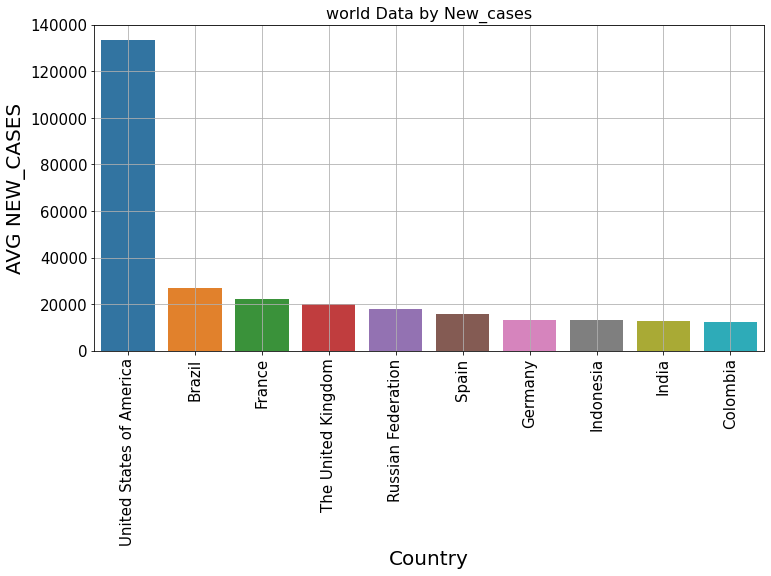

WHO_region
EURO     5
AMRO     3
SEARO    2
dtype: int64

In [121]:
covid.today_data('New_cases')

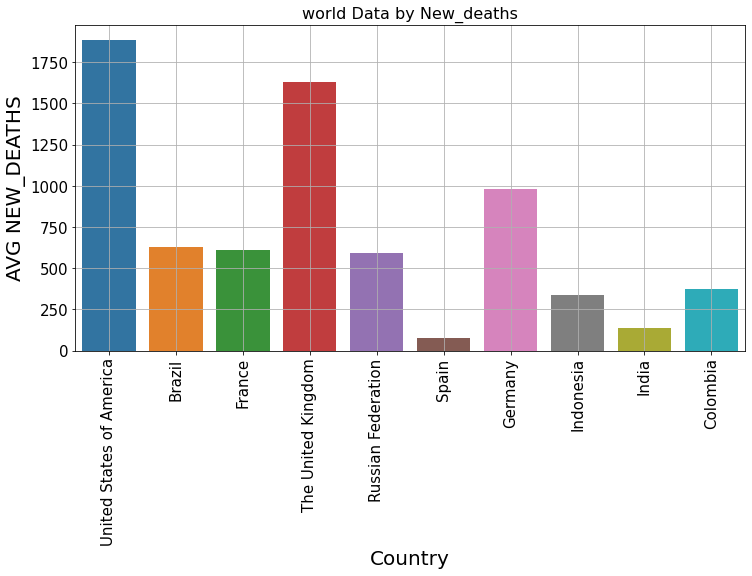

WHO_region
EURO     5
AMRO     3
SEARO    2
dtype: int64

In [122]:
covid.today_data('New_deaths')

### As of Today(28.1.2021) US is affected the most by more than 130,000 New Cases and 2000 and above New Deaths

### Comparing to US other countries are fairly doing a great job by keeping the cases below 1000

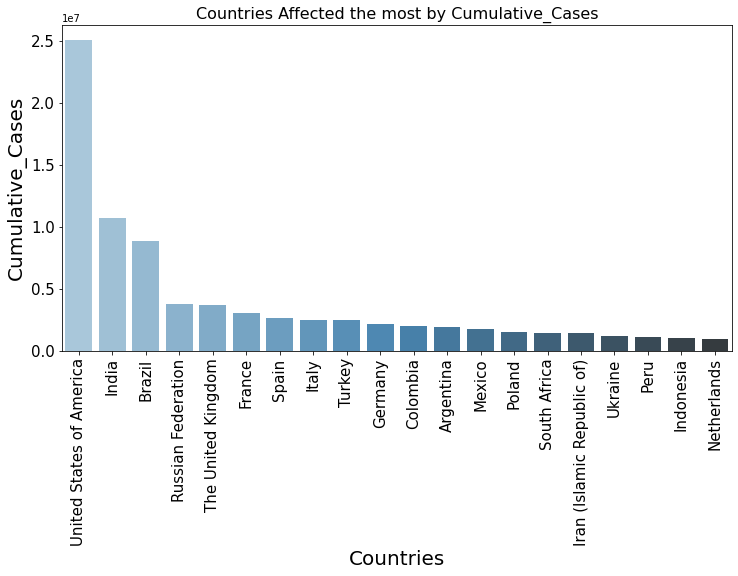

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2021-01-27,US,AMRO,133409,25050308,1885,417889
India,2021-01-27,IN,SEARO,12689,10689527,137,153724
Brazil,2021-01-27,BR,AMRO,26816,8871393,627,217664
Russian Federation,2021-01-27,RU,EURO,17741,3774672,594,71076
The United Kingdom,2021-01-27,GB,EURO,20088,3689750,1631,100162
...,...,...,...,...,...,...,...
Pitcairn Islands,2021-01-27,PN,WPRO,0,0,0,0
Nauru,2021-01-27,NR,WPRO,0,0,0,0
Democratic People's Republic of Korea,2021-01-27,KP,SEARO,0,0,0,0


In [123]:
covid.cumulative_cases()

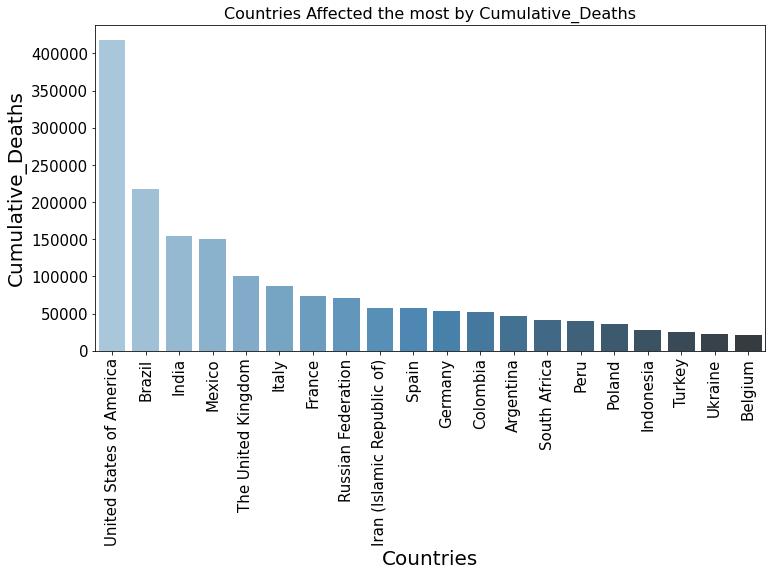

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2021-01-27,US,AMRO,133409,25050308,1885,417889
Brazil,2021-01-27,BR,AMRO,26816,8871393,627,217664
India,2021-01-27,IN,SEARO,12689,10689527,137,153724
Mexico,2021-01-27,MX,AMRO,8521,1771740,659,150273
The United Kingdom,2021-01-27,GB,EURO,20088,3689750,1631,100162
...,...,...,...,...,...,...,...
Timor-Leste,2021-01-27,TL,SEARO,1,68,0,0
Micronesia (Federated States of),2021-01-27,FM,WPRO,0,1,0,0
Tokelau,2021-01-27,TK,WPRO,0,0,0,0


In [124]:
covid.cumulative_deaths()

### Again US tops the list in Overall New Cases at a rate of 2.5 * 10^ 7   and   New Deaths at a rate of 400,000  above Deaths Overall

### Brazil is in the Second place in overall New Cases and second place in overall deaths

### Though India is in  Third place, by considering INDIA's population India have been contained very well

### Considering other countries population like UK,Mexico, Brazil they are in the poor place as well


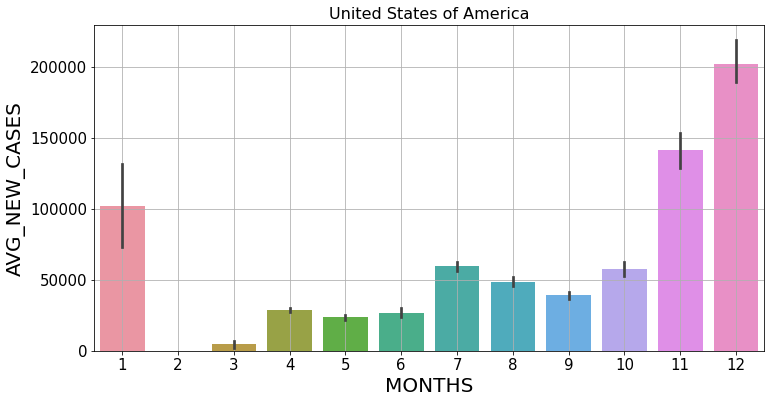

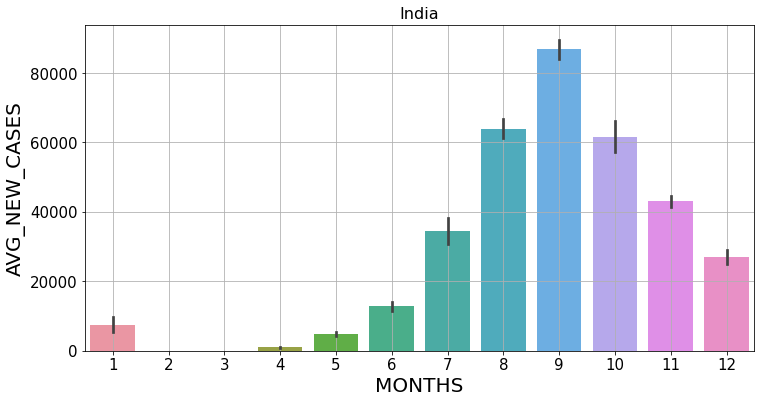

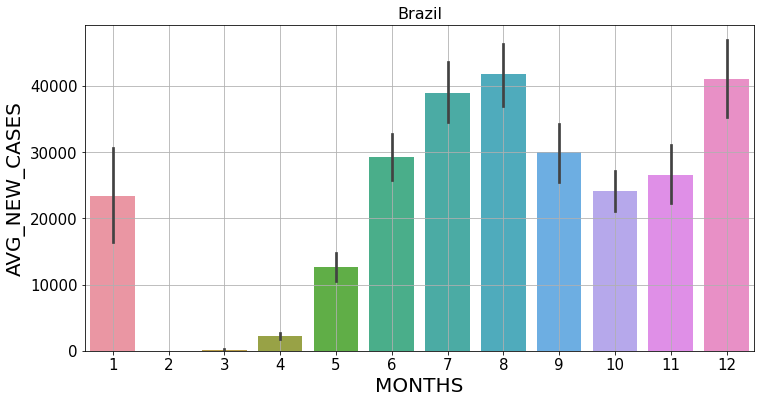

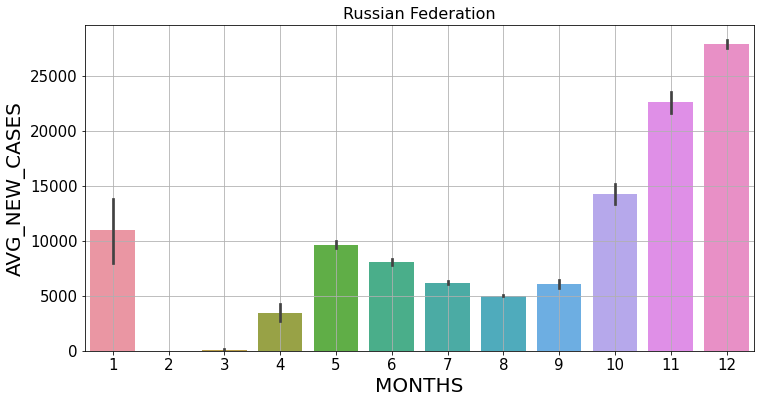

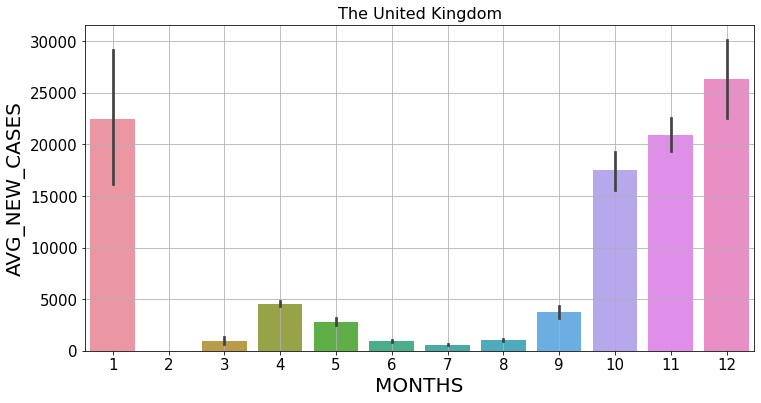

In [125]:
covid.avg_new_cases()

### The Above plot shows that how disease spread over this year in top 5 highly affected countries. You can view your country as well by adding your country name in function argument

### The month ( December ) is the worst month for US as their New_Cases are on top of it more than any other month. We know US  has so many christian's don't know how they are going to celebrate christamas and New year, but for sure this not the NewYear that they wanted.

### Same as with Russia and Brazil their new cases are higher in the month of December more than any other month, but the countries have done well keep cases to their control.

### India has done well keep cases down, as you can see India has seen it's peek in the month of September and then the cases are droping rapidly which is a good sign for India



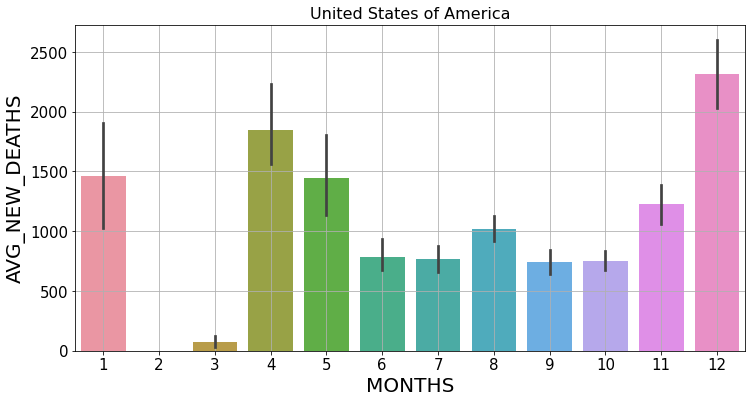

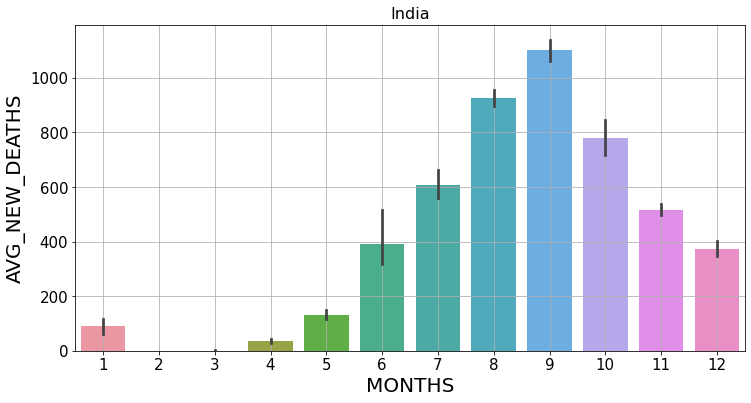

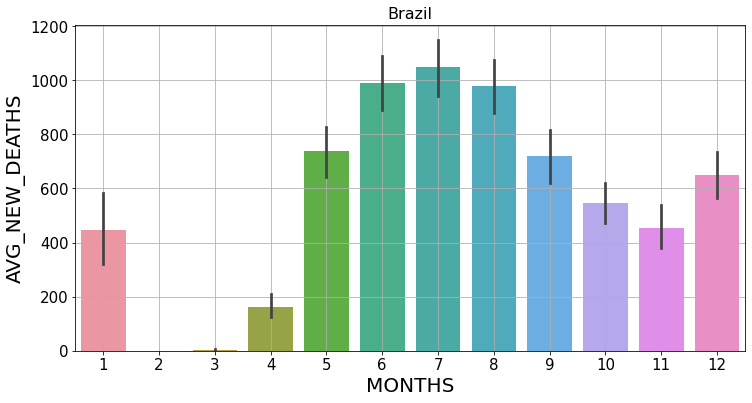

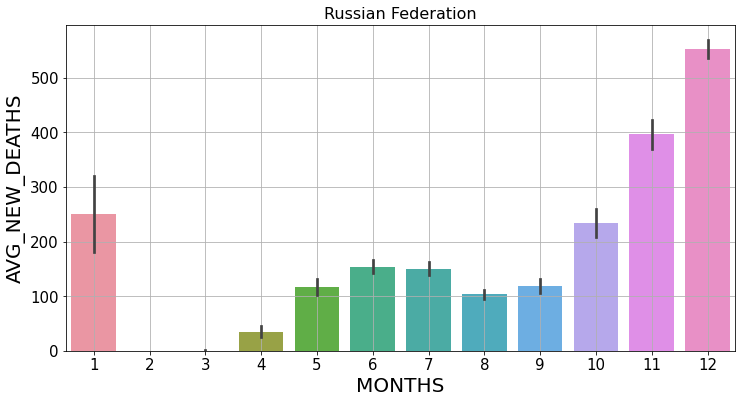

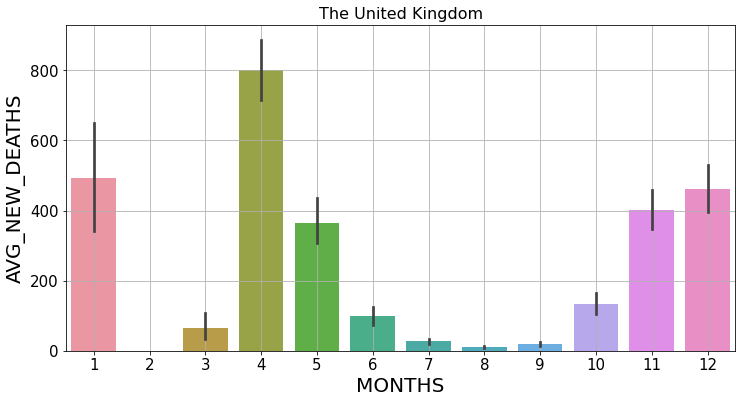

In [126]:
covid.avg_new_deaths()

#### If we talk about Corona the first country that comes on to our mind is US. On Average more than 1400 people are dying in US in the month of January. 

#### India's New Case and New Death's plot is pretty same which means the more no.of.cases the more no.of.Deaths. 


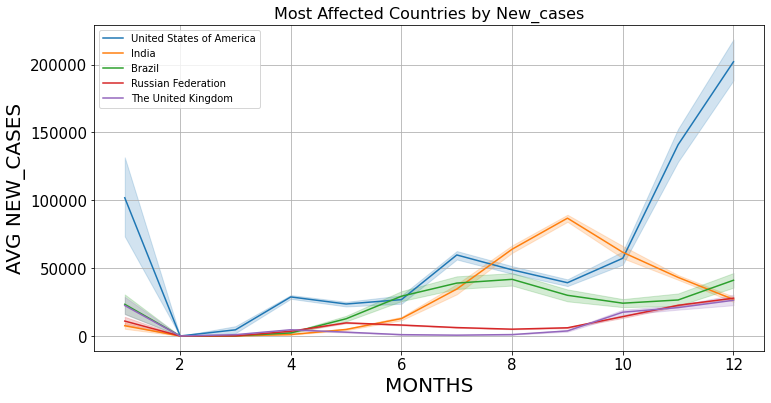

In [127]:
covid.most_affected_countries()

#### While all the countries are fighting to let their cases go down below 50,000 US is the only country that goes more than 2,00,000  in New Cases.

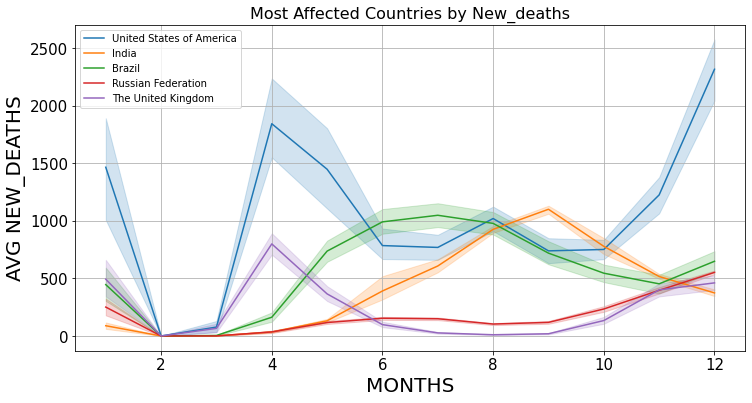

In [128]:
covid.most_affected_countries(by = 'New_deaths')

### Through this plot we can see that how countries have been progressed over the years by New Deaths on each month on average in single graph


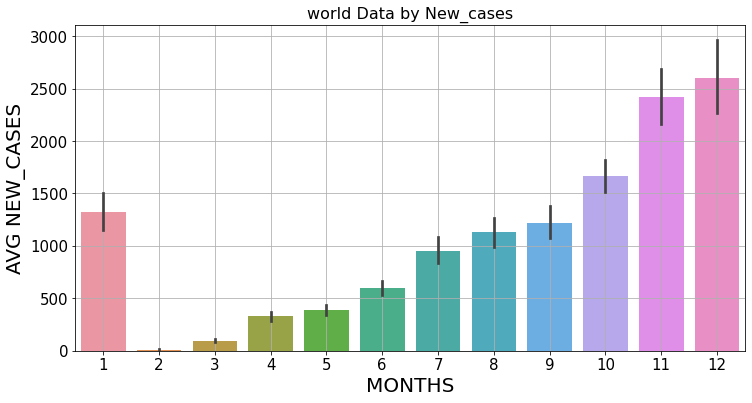

In [129]:
covid.world_analysis()

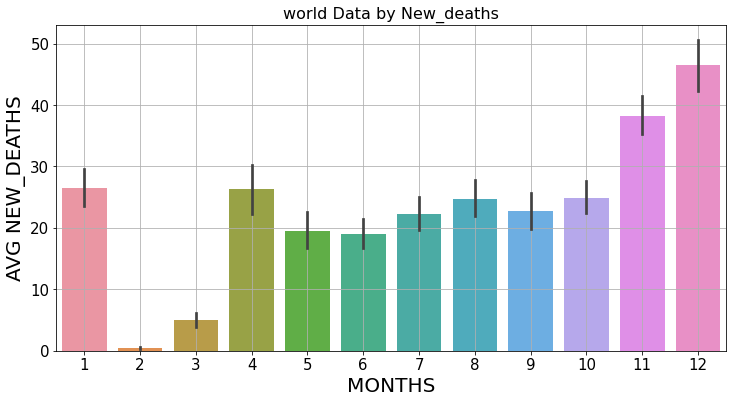

In [130]:
covid.world_analysis(by = 'New_deaths')

### The Above two plot shows how this Corona has affected countries worldwide. The whole 2020 has seen increasing number of cases but in 2021 there is a huge fall in both cases and deaths world wide.

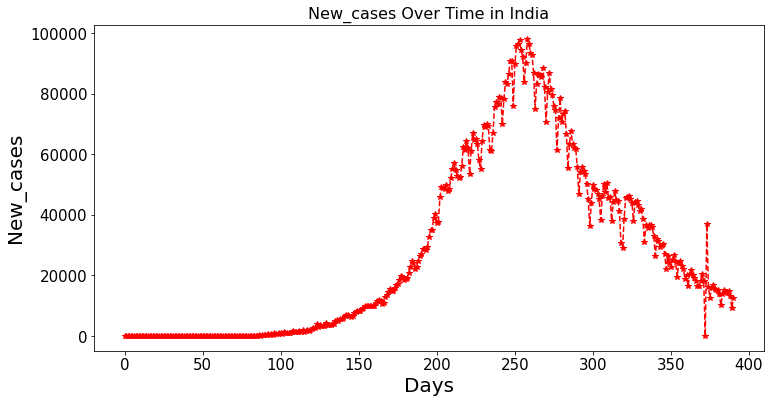

In [131]:
covid.cnt_data()

### This Plot shows how country is progressed with respect to New Cases. You can Check for your country.

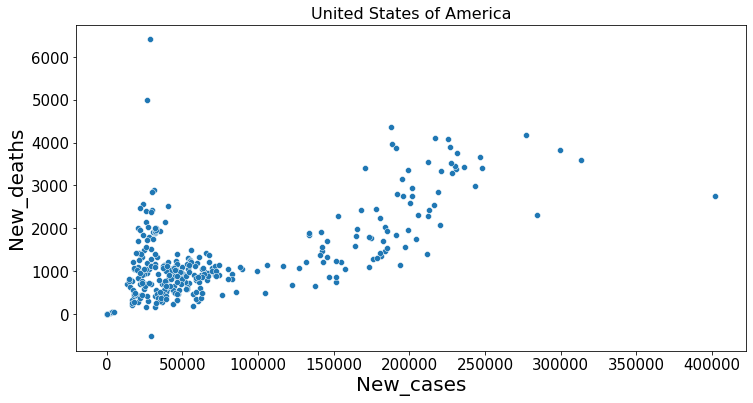

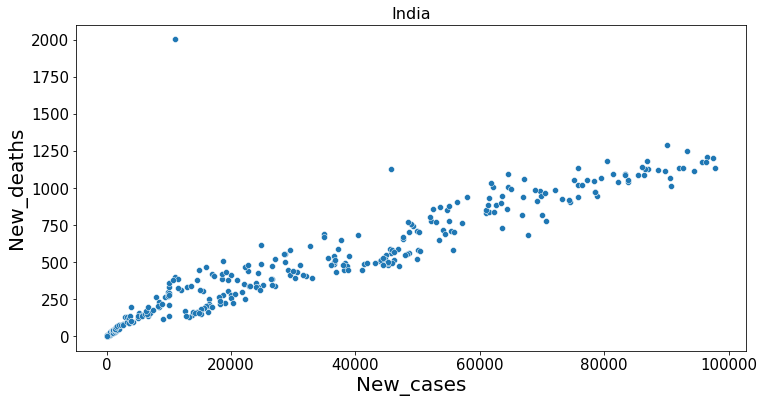

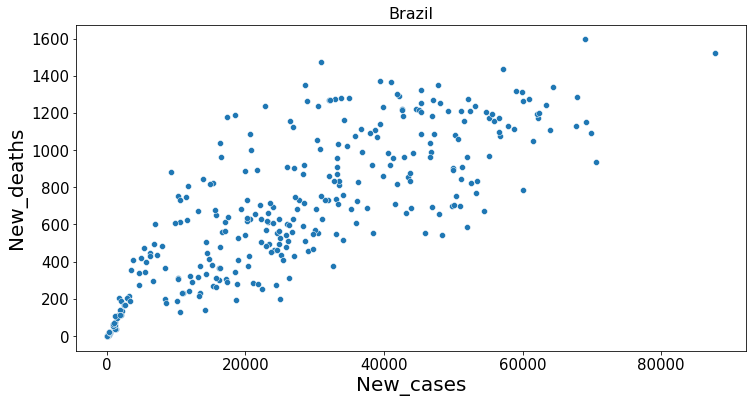

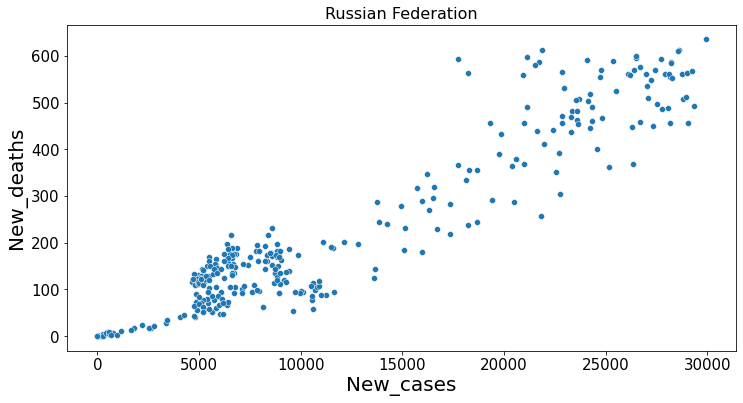

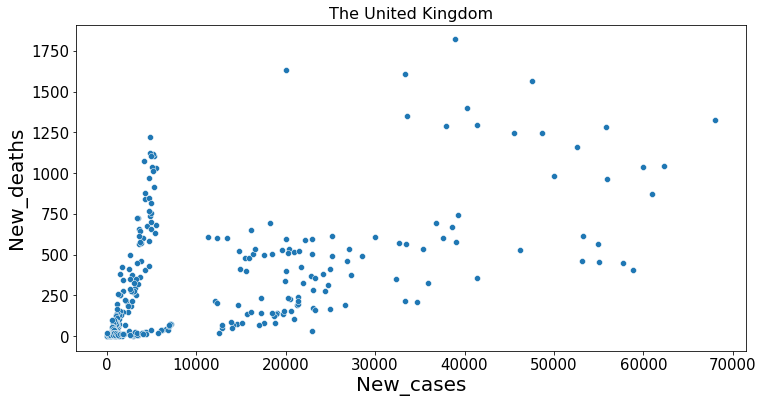

In [132]:
covid.case_and_death()

### This Plot shows how country is progressed with respect to New Deaths . You can Check for your country.

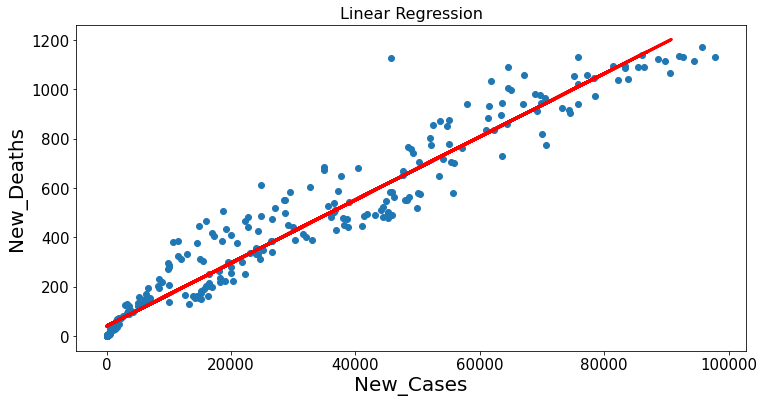

95.29255707596727


In [147]:
covid.Linear_Regression(cnt_name = 'India')